In [1]:
import pandas as pd

In [166]:
data = pd.read_csv("cleandf.csv")

In [167]:
#data.head(2)
data.dropna(inplace= True)

In [168]:
data.shape

(7100, 31)

In [170]:
#data["Weather Normalized Source EUI (kBtu/ft²)"].nlargest(20)

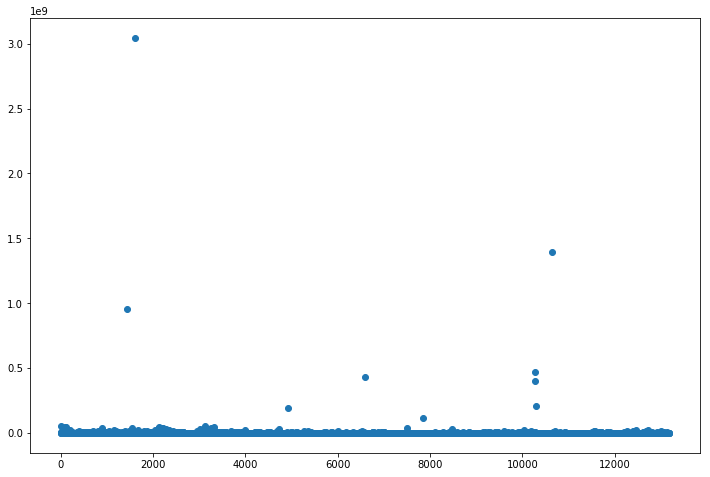

In [135]:
#depedent variable
Electricity = data[['Weather Normalized Site Electricity (kWh)']]
fig = plt.figure(figsize=(12,8))
plt.scatter(Electricity.index,Electricity)

In [172]:
data['Weather Normalized Site Electricity (kWh)'].nlargest(10)

1619     3.046183e+09
10644    1.392508e+09
1436     9.583862e+08
10280    4.703747e+08
6590     4.305753e+08
10276    4.026722e+08
10302    2.056902e+08
4927     1.932907e+08
7844     1.132639e+08
0        5.205246e+07
Name: Weather Normalized Site Electricity (kWh), dtype: float64

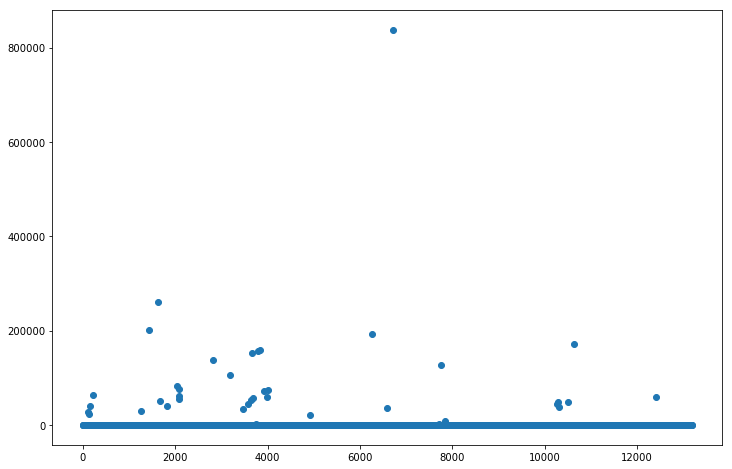

In [136]:
EUI = data[['Weather Normalized Source EUI (kBtu/ft²)']]
fig = plt.figure(figsize=(12,8))
plt.scatter(EUI.index,EUI)

In [174]:
#remove outliers
data = data[data['Weather Normalized Site Electricity (kWh)']<1000000000]
data = data[data['Weather Normalized Source EUI (kBtu/ft²)']<100000]
EUI = data[['Weather Normalized Source EUI (kBtu/ft²)']]
Electricity = data[['Weather Normalized Site Electricity (kWh)']]

In [146]:
data.columns

Index(['Weather Normalized Site Electricity (kWh)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'BuiltFAR', 'YearBuilt',
       'DOF Property Floor Area (ft²)', 'LotType', 'ProxCode', 'BBL',
       'Zip Code', 'ENERGY STAR Score', 'Fuel Oil #1 Use (kBtu)',
       'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)',
       'District Steam Use (kBtu)', 'District Hot Water Use (kBtu)',
       'District Chilled Water Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)', 'LotArea', 'ComArea',
       'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea',
       'FactryArea', 'OtherArea', 'NumFloors'],
      dtype='object')

In [176]:
# remove BLL and zipcode and dependent variable
X = data[['BuiltFAR', 'YearBuilt',
       'DOF Property Floor Area (ft²)', 'LotType', 'ProxCode', 
       'ENERGY STAR Score', 'Fuel Oil #1 Use (kBtu)',
       'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)',
       'District Steam Use (kBtu)', 'District Hot Water Use (kBtu)',
       'District Chilled Water Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)', 'LotArea', 'ComArea',
       'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea',
       'FactryArea', 'OtherArea', 'NumFloors']]

In [177]:
#replace Not Available with zero
X['Fuel Oil #1 Use (kBtu)'].replace('Not Available', 0, inplace=True)
X['Fuel Oil #2 Use (kBtu)'].replace('Not Available', 0, inplace=True)
X['Fuel Oil #4 Use (kBtu)'].replace('Not Available', 0, inplace=True)
X['Fuel Oil #5 & 6 Use (kBtu)'].replace('Not Available', 0, inplace=True)
X['Diesel #2 Use (kBtu)'].replace('Not Available', 0, inplace=True)
X['District Hot Water Use (kBtu)'].replace('Not Available', 0, inplace=True)
X['District Chilled Water Use (kBtu)'].replace('Not Available', 0, inplace=True)
X['District Steam Use (kBtu)'].replace('Not Available', 0, inplace=True)

/Users/chenhongting/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [149]:
import numpy as np
from sklearn import neighbors

In [150]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [175]:
Electricity.shape

(7089, 1)

In [178]:
X.shape

(7089, 27)

In [78]:
knn.fit(X, Electricity) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [179]:
from sklearn.cross_validation import train_test_split

In [180]:
OS_knn = []
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X,
                           Electricity, test_size = 0.3, random_state =i)
    knn = KNeighborsRegressor(n_neighbors=1)
    knn.fit(X_train, y_train) 
    OS_knn.append(1-((knn.predict(X_test)-y_test)**2).mean()/y_test.var())
    
print(np.mean(OS_knn))

0.954132094172


In [182]:
OS_knn = []
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X,
                           EUI, test_size = 0.3, random_state =i)
    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train, y_train) 
    OS_knn.append(1-((knn.predict(X_test)-y_test)**2).mean()/y_test.var())
    
print(np.mean(OS_knn))

0.75283264802
